<a href="https://colab.research.google.com/github/yvonnieh/CS4375-Assignment-1/blob/main/part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 2: Linear Regression using ML libraries
<h4> CS 4375.001
<h4> Yvonne Hsiao
<h4> Deadline: 09/17/23

In [ ]:
# libaries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
# load the dataset
url = 'https://raw.githubusercontent.com/yvonne-hsiao/Assignment1_Linear_Regression/main/winequality-red.csv'
df = pd.read_csv(url)

#Data Preprocessing
- Remove null or NA values
- Remove any redundant rows
- Convert categorical variables to numerical variables
- If you feel an attribute is not suitable or is not correlated with the
outcome, you might want to get rid of it.
- Any other pre-processing that you may need to perform

In [ ]:
# check for null or NA values
print("Null or NA values found?:", ("No\n" if df.isnull().sum().sum() == 0 else "Yes\n"))

# check for duplicate rows
print("Duplicate entries found?:", ("No\n" if df.duplicated().sum() == 0 else "Yes\n"))

# check if there is categorical values
print("Categorical values?:")
print(df.dtypes)

# print dataset description
print("\nDescription of the dataframe:")
print(df.describe())

Null or NA values found?: No

Duplicate entries found?: Yes

Categorical values?:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide       int64
total sulfur dioxide      int64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Description of the dataframe:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.20

In [ ]:
# Remove any redundant rows
df = df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   int64  
 6   total sulfur dioxide  1359 non-null   int64  
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 138.0 KB


<h3> Find the correlation using different graphs




Attributes correlation on quality variable in decending order:
quality                 1.000000
alcohol                 0.480343
volatile acidity        0.395214
sulphates               0.248835
citric acid             0.228057
density                 0.184252
total sulfur dioxide    0.177862
chlorides               0.130988
fixed acidity           0.119024
pH                      0.055245
free sulfur dioxide     0.050343
residual sugar          0.013640
Name: quality, dtype: float64


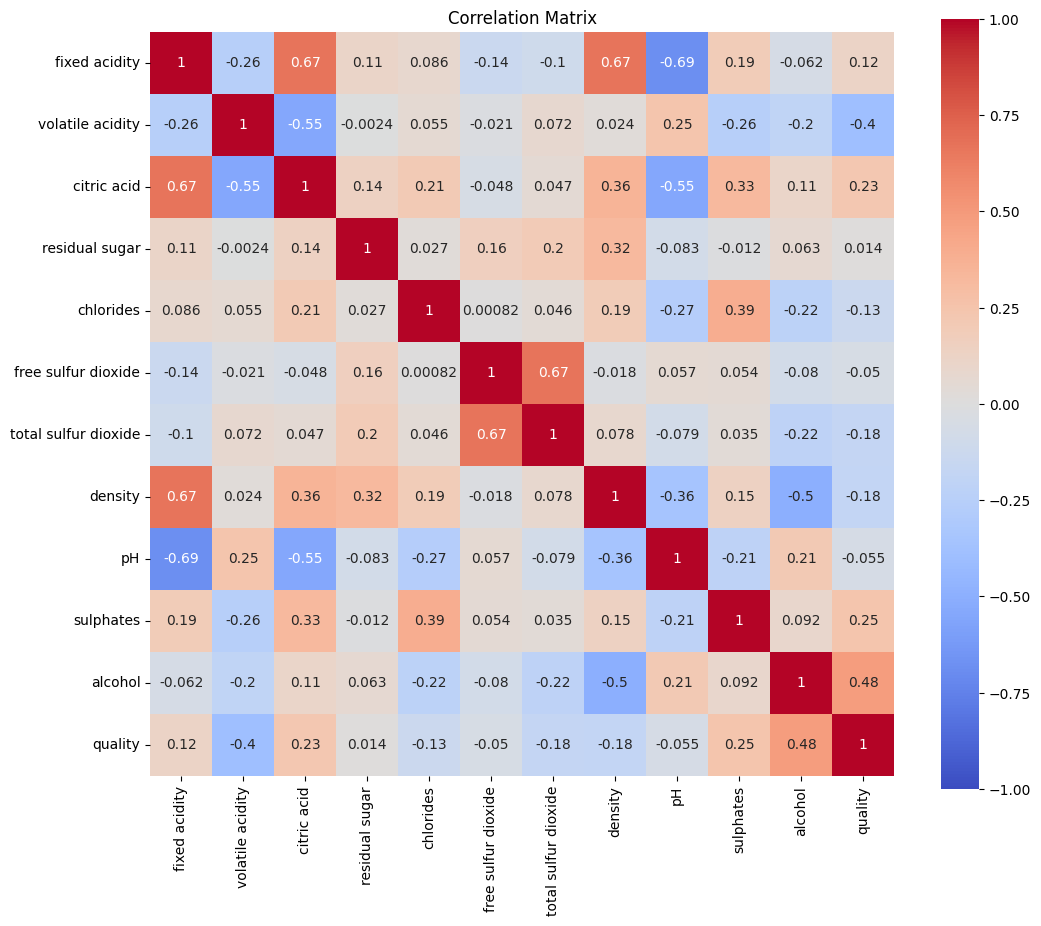

In [ ]:
# Print the correlation of different attribute on 'quality' variable
print("\nAttributes correlation on quality variable in decending order:")
print(abs(df.corr(numeric_only=True))['quality'].sort_values(ascending = False))

# Visualization of the correlation in heatmap
def show_correlation_matrix(data):
    # Compute the correlation matrix
    corr = data.corr()

    # Plot the heatmap
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
    plt.title('Correlation Matrix')
    plt.show()
show_correlation_matrix(df)

<Axes: >

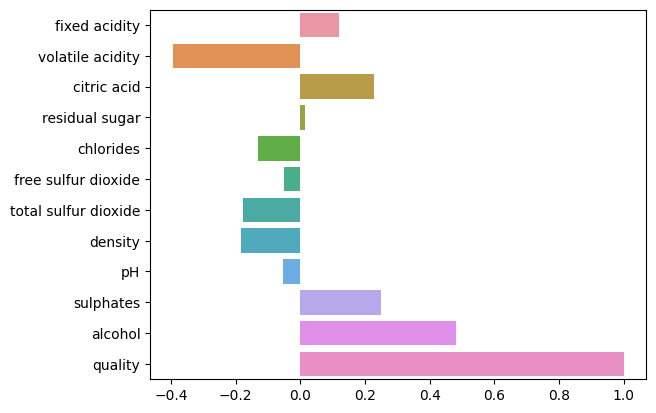

In [ ]:
# Checking the correlation of all the attributes vs the quality variable
sns.barplot(y = df.corr().loc['quality'].index, x = df.corr().loc['quality'].values)

In [ ]:
# high correlation attributes: volatile acidity, citric acid, sulphates, alcohol, and density
df = df[['volatile acidity', 'citric acid', 'sulphates', 'alcohol', 'density', 'quality']]
column_names = ['Volatile acidity', 'Citric acid', 'Sulphates', 'Alcohol', 'Density']

# Build the model
<h3> Splitting dataset into training and testing in 80/20 ratio

In [ ]:
# Prepare X and Y matrix
X = np.array(df.drop(['quality'], axis = 1))
Y = np.array(df['quality'])


In [ ]:
# Split train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1087, 5) (272, 5) (1087,) (272,)


In [ ]:
# training a linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# model evaluation for training set
Y_train_pred = model.predict(X_train)
mse = mean_squared_error(Y_train, Y_train_pred)
r2 = r2_score(Y_train, Y_train_pred)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
MSE is 0.4612983058860594
R2 score is 0.3284877144461572




In [ ]:
# model evaluation for testing set
Y_test_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_test_pred)
r2 = r2_score(Y_test, Y_test_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for testing set
--------------------------------------
MSE is 0.3815936160746021
R2 score is 0.3952570025776847




# Graphs (Plots)
<h3> Coefficient Plot

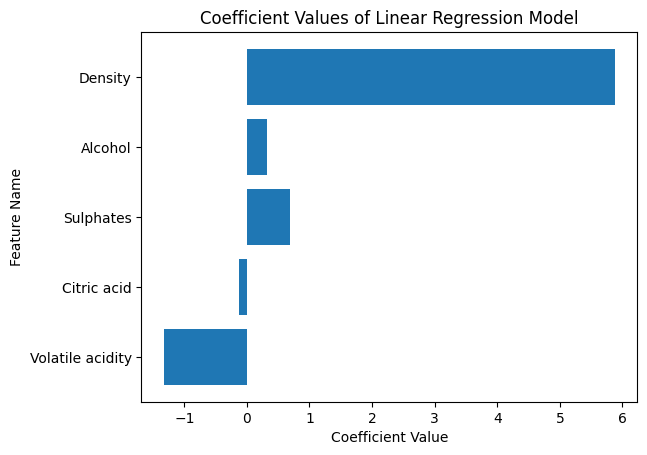

In [ ]:
coef = model.coef_
feature_names = ['Volatile acidity', 'Citric acid', 'Sulphates', 'Alcohol', 'Density']
plt.barh(feature_names, coef)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature Name")
plt.title("Coefficient Values of Linear Regression Model")
plt.show()

<h3> Learning Curve

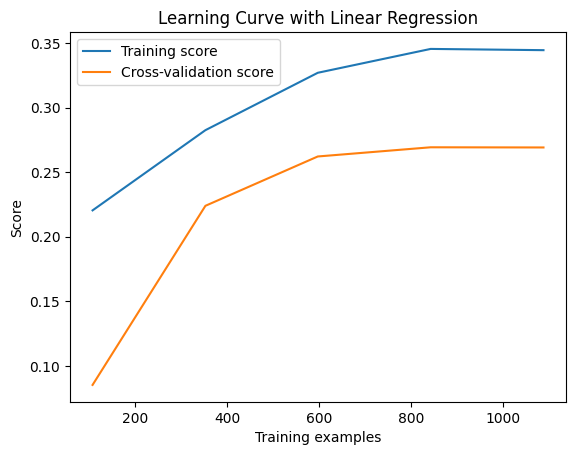

In [ ]:
#how the performance of the model improves over time with more data

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, Y)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Cross-validation score")
plt.title("Learning Curve with Linear Regression")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend()
plt.show()
